# CAH sur le jeu de données mfeat

&nbsp;

**PS : cet exemple est à titre illustratif car les classes du jeu de données sont déjà connues.**  

**Description**   
On dispose de 2000 images décrites par 6 ensembles d’indicateurs (coefficients de Fourier, profil de corrélations, coefficients de Karhunen-Love, valeurs des pixels moyennés, moments de Zernike, morphologie). Chacune de ces images représente un chiffre manuscrit. Une description des données est disponible [ici](https://archive.ics.uci.edu/ml/datasets/Multiple+Features).

Quelques liens pour comprendre la signification des variables:  

* Série de Fourier: http://maths.cnam.fr/Didacticiels/Sur_Le_Traitement_Du_Son/coinmath.htm  


* Coefficient de Karhunen-Love: http://www.tsi.enst.fr/pages/enseignement/ressources/mti/KL/site/principe_KL.html  


* Pour les pixels : https://images.math.cnrs.fr/Le-traitement-numerique-des-images.html?lang=fr  

##### RUBRIQUES

[IMPORTS](#imports)  

[REGLAGES DU NOTEBOOK](#reglages)  

[IMPORT, VÉRIFICATION ET MANIPULATION DES DONNÉES](#import_check)

[ANALYSE UNIVARIÉE ET BIVARIÉE](#analyse_exploratoire_uni_bi)
    
[ANALYSE MULTIVARIÉE : CAH version 1 (toutes les variables)](#clustering_cah_v1) 

[ANALYSE MULTIVARIÉE : CAH version 2 (groupes de variables)](#clustering_cah_v2) 

[REQUIREMENTS.txt](#requirements)

## <a id="imports" style="color:black">IMPORTS</a>

In [1]:
## packages de travail

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import cluster, metrics

## <a id="reglages" style="color:black">REGLAGES DU NOTEBOOK</a>

In [2]:
## Nombre de lignes/colonnes que Pandas peut afficher dans le notebook
pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_columns', 500)


## Hauteur/largeur maximale des cellules que Pandas peut afficher dans le notebook sans tronquer
#pd.set_option('display.width', 1000)


## Affichage des nombres à virgule en gardant seulement 5 chiffres après la virgule
pd.set_option('display.float_format', lambda x: '%.5f' % x)


## Nombre d'éléments max qu'on peut afficher dans un array + suppression de notation scientifique
np.set_printoptions(threshold=200,suppress=True)

## <a id="import_check" style="color:black">IMPORT, VÉRIFICATION ET MANIPULATION DES DONNÉES</a>


In [3]:
df_train = pd.read_csv("../data/csv-txt/mfeat/data_train.csv")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 650 entries, fac_1 to class
dtypes: float64(190), int64(460)
memory usage: 7.4 MB


In [5]:
df_train.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [6]:
# Mettre la variable 'class' en string
df_train["class"] = df_train["class"].astype(str)

In [7]:
df_train.dtypes

fac_1       int64
fac_2       int64
fac_3       int64
fac_4       int64
fac_5       int64
           ...   
zer_44    float64
zer_45    float64
zer_46    float64
zer_47    float64
class      object
Length: 650, dtype: object

In [8]:
df_train["class"].describe()

count     1500
unique      10
top          0
freq       150
Name: class, dtype: object

In [9]:
df_train.head()

,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,fac_9,fac_10,...,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46,zer_47,class
0,182,192,575,657,650,702,1,9,5,6,...,30.37704,8.13780,4.24529,179.84887,331.68767,8.04001,16.30939,53.62373,487.26241,0
1,97,185,530,688,603,688,3,6,5,4,...,55.36354,41.25013,4.92292,183.83757,324.73343,15.40222,54.79385,57.74679,554.88999,0
2,135,207,630,685,578,599,8,9,7,3,...,7.68219,22.56606,9.17687,201.46880,535.09909,1.78629,15.74437,57.65181,643.78864,0
3,265,277,720,728,630,674,15,9,9,7,...,14.27184,8.58904,13.33504,172.97290,273.34529,3.30595,7.34407,52.91831,406.85680,0
4,134,164,614,618,618,656,2,8,1,6,...,15.24173,34.62034,7.06070,172.17341,321.38851,4.24516,16.98600,53.95255,521.36401,0


In [ ]:
# Vérification doublons parfaits
df_train[df_train.duplicated(keep=False)]

In [ ]:
## Suppression des doublons parfaits
df_train.drop_duplicates(inplace=True)

In [ ]:
df_train.shape

## <a id="analyse_exploratoire_uni_bi" style="color:black">ANALYSE UNIVARIEE ET BIVARIÉE</a>

Se référer au notebook 'acp mfeat' pour l'analyse exploratoire détaillée

## <a id="clustering_cah_v1" style="color:black">ANALYSE MULTIVARIÉE : CAH version 1 (toutes les variables)</a>

In [10]:
n = df_train.shape[0]
p = df_train.drop(["class"], axis=1).shape[1]

In [11]:
## Standardisation
sc = StandardScaler()

arr = sc.fit_transform(df_train.drop(["class"], axis=1))

In [12]:
arr.shape

(1500, 649)

In [14]:
mat_liens = linkage(arr, method="ward", metric="euclidean")

In [15]:
mat_liens.shape

(1499, 4)

In [16]:
mat_liens

array([[ 850.        ,  876.        ,    0.        ,    2.        ],
       [ 453.        ,  518.        ,    0.        ,    2.        ],
       [1065.        , 1145.        ,    0.        ,    2.        ],
       ...,
       [2993.        , 2995.        ,  337.3163214 ,  912.        ],
       [2988.        , 2992.        ,  368.14593421,  588.        ],
       [2996.        , 2997.        ,  447.6815467 , 1500.        ]])

In [17]:
print(mat_liens.shape)
mat_liens[0]

(1499, 4)


array([850., 876.,   0.,   2.])

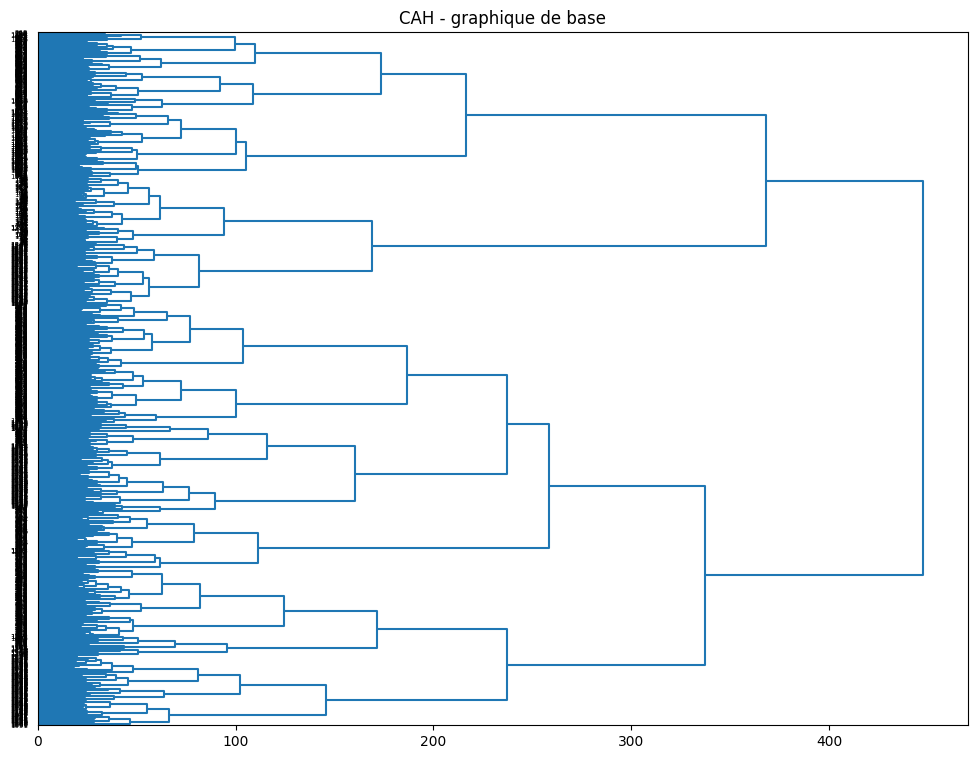

In [18]:
plt.figure(figsize=(12,9))

plt.title("CAH - graphique de base")
dendrogram(mat_liens, labels=df_train.index, orientation="right", color_threshold=0)
plt.show()

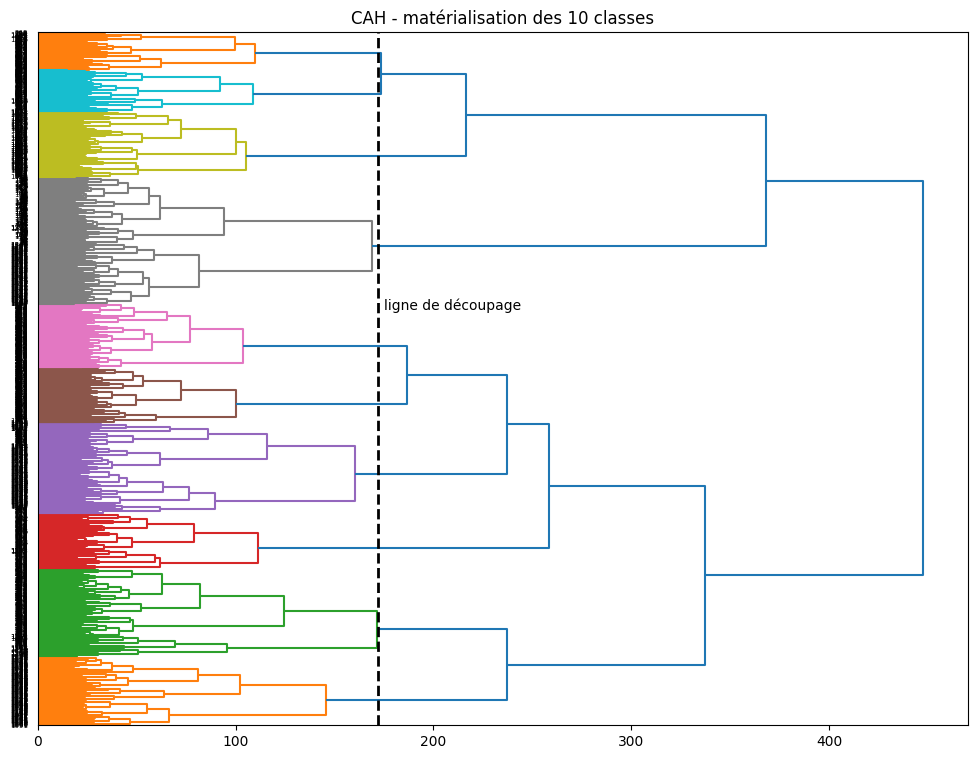

In [19]:
## Découpage en 10 classes (déjà connues)

plt.figure(figsize=(12,9))

plt.title("CAH - matérialisation des 10 classes")
dendrogram(mat_liens, labels=df_train.index, orientation="right", color_threshold=172)
plt.axvline(172, color='black', linestyle='dashed', linewidth=2)
plt.annotate("ligne de découpage", xy=(172, 4.5), xytext=(175, 9000))
plt.show()

In [20]:
## Extraction des 10 clusters
groupes = fcluster(mat_liens, t=172, criterion="distance")
groupes

array([7, 7, 7, ..., 4, 4, 4], dtype=int32)

In [21]:
np.unique(groupes)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [22]:
# Tri des indices des clusters
idx = np.argsort(groupes)
idx

array([1050, 1144, 1145, ...,  654,  679,  674], dtype=int64)

In [23]:
corresp_cah = pd.DataFrame({"Class":df_train["class"][idx], "Groupe":groupes[idx]})

pd.crosstab(corresp_cah["Class"], corresp_cah["Groupe"])

Groupe,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
0,0,7,0,0,0,0,142,0,0,1
1,0,14,116,13,0,1,0,1,0,5
2,0,148,0,1,0,1,0,0,0,0
3,0,4,0,7,3,134,0,0,0,2
4,0,0,0,1,0,0,0,0,83,66
5,0,3,0,29,114,1,0,0,0,3
6,0,0,0,0,1,0,0,141,6,2
7,148,2,0,0,0,0,0,0,0,0
8,0,11,3,0,0,0,133,0,0,3


In [24]:
#moyenne par variable
m = df_train.iloc[:,:-1].mean()

print("Moyennes par variables \n")
print(m)
print("\n===========================================\n")

#TSS
TSS = df_train.shape[0]*df_train.var(ddof=0)
print(TSS)

Moyennes par variables 

fac_1    272.40667
fac_2    323.12800
fac_3    773.47733
fac_4    756.78067
fac_5    640.51067
            ...   
zer_43   399.20443
zer_44     9.25331
zer_45    86.52476
zer_46    54.59280
zer_47   508.38428
Length: 649, dtype: float64


fac_1    12552181.93333
fac_2    17971533.42400
fac_3    29349998.22933
fac_4    18075582.83933
fac_5     3601832.82933
              ...      
zer_43   13708153.49438
zer_44      70266.41878
zer_45    4068600.94503
zer_46     181895.47253
zer_47    7533737.83960
Length: 649, dtype: float64


C:\Users\Nelly\AppData\Local\Temp\ipykernel_19268\4193523354.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TSS = df_train.shape[0]*df_train.var(ddof=0)


In [25]:
# Interprétation des classes (univariée)

#dataframe conditionnellement aux groupes
gb_cah = df_train.iloc[:,:-1].groupby(groupes)

#effectifs conditionnels
nk_cah= gb_cah.size()

#moyennes conditionnelles
mk_cah= gb_cah.mean()

#print("Moyennes conditionnelles aux groupes \n")
#print(mk_cah)
#print("\n===========================================\n")

#pour chaque groupe, écart à la moyenne par variable
EMk_cah= (mk_cah - m)**2

#pondéré par les effectifs du groupe
EM_cah = EMk_cah.multiply(nk_cah,axis=0)

#somme des valeurs => BSS
BSS_cah = np.sum(EM_cah,axis=0)

#carré du rapport de corrélation = part de la variance expliquée par l'appartenance aux groupes
eta2_cah = BSS_cah/TSS

print("Part de la variance totale expliquée par l'appartenance aux clusters \n")
print(eta2_cah.sort_values(ascending=False))

Part de la variance totale expliquée par l'appartenance aux groupes 

fac_181   0.81224
fac_29    0.79159
fac_65    0.78341
fac_185   0.77530
fac_97    0.75989
            ...  
pix_226   0.04644
pix_36    0.04379
kar_55    0.04320
kar_61    0.03977
pix_37    0.03654
Length: 649, dtype: float64


In [26]:
print("Part de la variance totale expliquée par l'appartenance aux clusters : 15 premières variables \n")
print(eta2_cah.sort_values(ascending=False).iloc[:15])

Part de la variance totale expliquée par l'appartenance aux groupes : 15 premières variables 

fac_181   0.81224
fac_29    0.79159
fac_65    0.78341
fac_185   0.77530
fac_97    0.75989
fac_113   0.75737
fac_125   0.75320
fac_109   0.75223
kar_1     0.74906
mor2      0.74473
fac_1     0.73664
fac_133   0.72525
fac_55    0.72322
fac_53    0.71398
mor1      0.71296
dtype: float64


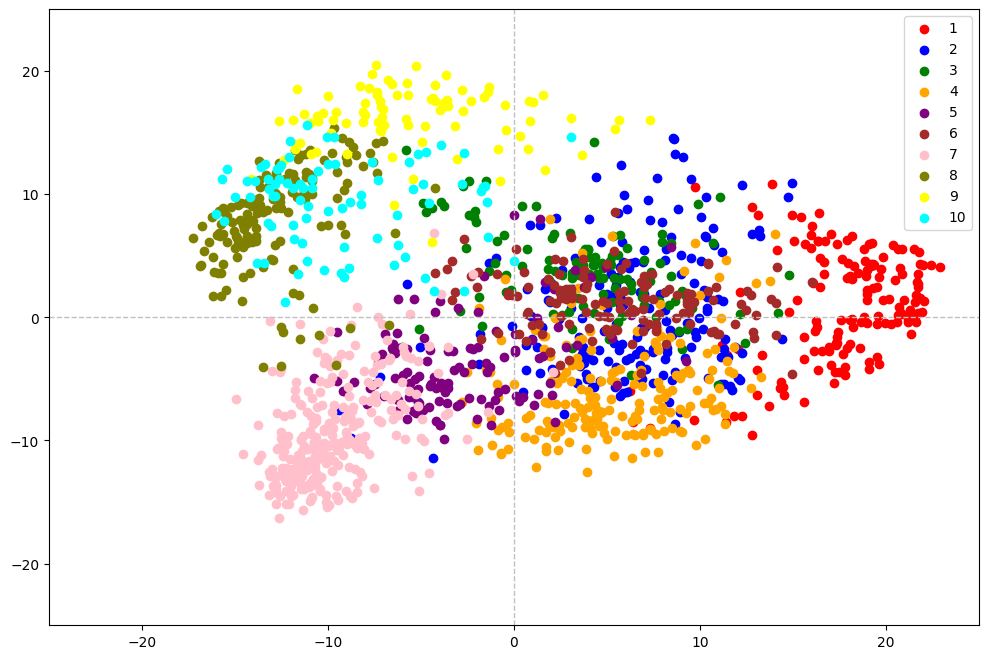

In [27]:
## Interprétation des classes (multivarié) pour tenir compte des liaisons entres les variables
## Ici, la véritable classe sera considérée comme une variable illustrative (quali)

coords = PCA(svd_solver="full", n_components=2).fit_transform(arr)

## Affichage des classes dans le 1er plan factoriel
plt.figure(figsize=(12,8))
couleurs = ["red","blue","green","orange","purple","brown","pink","olive","yellow","cyan"]
for couleur, k in zip(couleurs, np.unique(groupes)):
    plt.scatter(coords[groupes == k , 0], coords[groupes == k, 1], c=couleur, label=k)


plt.legend()
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.axvline(0, color="silver", linestyle="dashed", linewidth=1)
plt.axhline(0, color="silver", linestyle="dashed", linewidth=1)
plt.show()

## <a id="clustering_cah_v2" style="color:black">ANALYSE MULTIVARIÉE : CAH version 2 (groupes de variables)</a>

In [28]:
# Créer des patterns pour extraire les variables

ls_vars = list(df_train.columns)

fac_vars = [x for x in ls_vars if x.startswith("fac")]
four_vars = [x for x in ls_vars if x.startswith("fou")]
kar_vars = [x for x in ls_vars if x.startswith("kar")]
pix_vars = [x for x in ls_vars if x.startswith("pix")]
zer_vars = [x for x in ls_vars if x.startswith("zer")]
mor_vars = [x for x in ls_vars if x.startswith("mor")]

In [29]:
df_train_fac = df_train.loc[:, fac_vars + ["class"]].copy()
df_train_four = df_train.loc[:, four_vars + ["class"]].copy()
df_train_kar = df_train.loc[:, kar_vars + ["class"]].copy()
df_train_pix = df_train.loc[:, pix_vars + ["class"]].copy()
df_train_zer = df_train.loc[:, zer_vars + ["class"]].copy()
df_train_mor = df_train.loc[:, mor_vars + ["class"]].copy()

In [30]:
# Fonction clustering CAH

def clustering_cah(df, cible="class", t=0):
    """
    Fonction qui prend en entrée le dataframe, le nom de la variable cible ainsi que la distance à laquelle on 
    souhaite couper l'arbre. Par défaut la distance de découpage t est égale à 0
    """
    
    n = df.shape[0]
    p = df.drop(cible, axis=1).shape[1]
    groupe_variables = df.columns[0][:3]
    
    sc = StandardScaler()
    arr = sc.fit_transform(df.drop(cible, axis=1))
    
    mat_liens = linkage(arr, method="ward", metric="euclidean")
    
    if t == 0:
        
        plt.figure(figsize=(12,9))
        plt.title(f"CAH variables {groupe_variables} - graphique de base")
        dendrogram(mat_liens, labels=df.index, orientation="right", color_threshold=0)
        plt.show()
        
        print(f"Valeur de t: t={t}, pas de découpage on renvoie seulement mat_liens.")
        return mat_liens
    
    else:
        
        plt.figure(figsize=(12,9))

        plt.title(f"CAH variables {groupe_variables} - matérialisation des 10 classes")
        dendrogram(mat_liens, labels=df.index, orientation="right", color_threshold=t)
        plt.axvline(t, color='black', linestyle='dashed', linewidth=2)
        plt.annotate("ligne de découpage", xy=(t, 4.5), xytext=(t+3, 9000))
        plt.show()
        
        groupes = fcluster(mat_liens, t=t, criterion="distance")
        idx = np.argsort(groupes)
        corresp_cah = pd.DataFrame({"Class":df["class"][idx], "Cluster":groupes[idx]})
        crosstab_cah = pd.crosstab(corresp_cah["Class"], corresp_cah["Cluster"])


        #moyenne par variable
        m = df.drop(cible, axis=1).mean()

        #TSS
        TSS = df.shape[0]*df.var(ddof=0)
        
        #====== Interprétation des classes (univariée) #======
        gb_cah = df.drop(cible, axis=1).groupby(groupes)
        nk_cah= gb_cah.size()
        mk_cah= gb_cah.mean()
        EMk_cah= (mk_cah - m)**2
        EM_cah = EMk_cah.multiply(nk_cah,axis=0)
        BSS_cah = np.sum(EM_cah,axis=0)

        eta2_cah = BSS_cah/TSS
        print(f"Valeur de t: t={t}")
        return mat_liens, corresp_cah, crosstab_cah, mk_cah, eta2_cah

In [31]:
ls_dataframes = [df_train_fac, df_train_four, df_train_kar, df_train_pix, df_train_zer, df_train_mor]

In [ ]:
# Résultat de la CAH pour les 6 groupes de variables

fac_cah = {}
four_cah = {}
kar_cah = {}
pix_cah = {}
zer_cah = {}
mor_cah = {}

ls_rescah = (fac_cah, four_cah, kar_cah, pix_cah, zer_cah, mor_cah)
ls_names = ("fac_cah", "four_cah", "kar_cah", "pix_cah", "zer_cah", "mor_cah")

# for i,j,k in zip(ls_rescah, ls_dataframes,ls_names):
#     print("\nGraphique de", k, "\n")
#     clustering_cah(j)
#     print("\n=========================================================================\n")

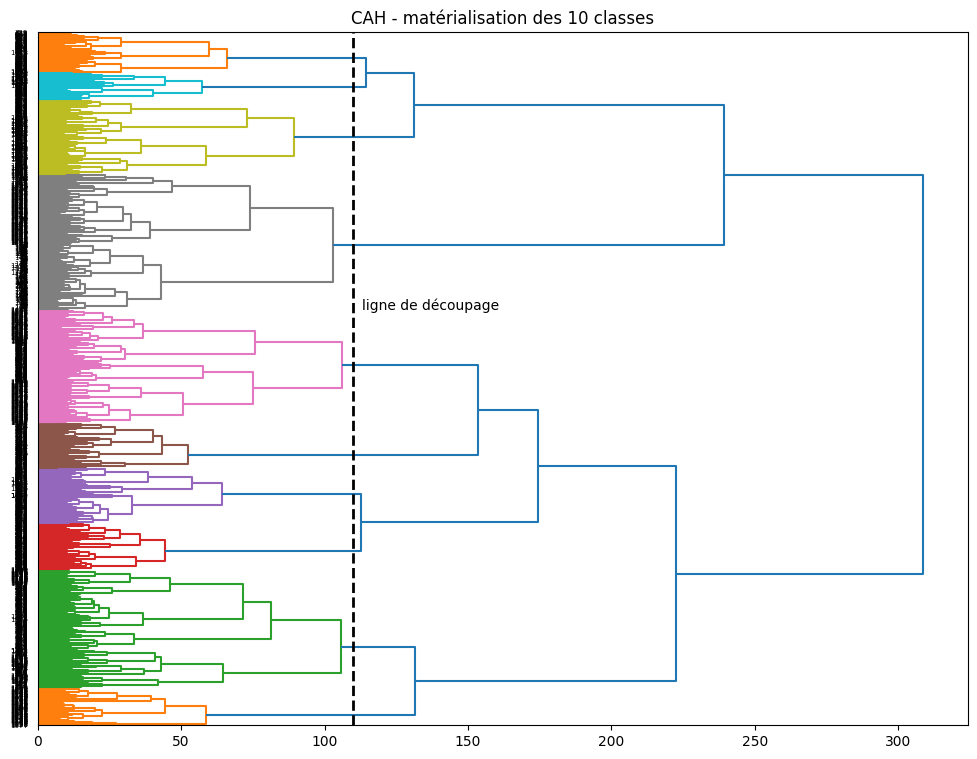

C:\Users\Nelly\AppData\Local\Temp\ipykernel_19268\3320173281.py:63: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TSS = df.shape[0]*df.var(ddof=0)


Valeur de t: t=110, découpage à cette distance on renvoie, mat_liens, eta_carre et dataframes de correspondance.




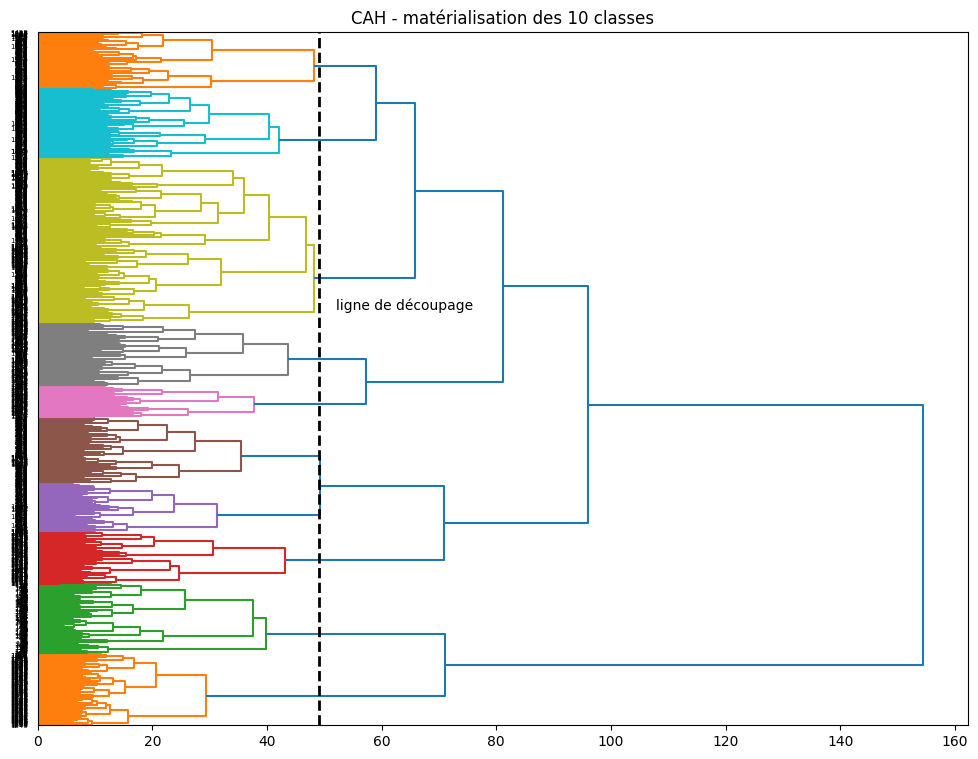

C:\Users\Nelly\AppData\Local\Temp\ipykernel_19268\3320173281.py:63: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TSS = df.shape[0]*df.var(ddof=0)


Valeur de t: t=49, découpage à cette distance on renvoie, mat_liens, eta_carre et dataframes de correspondance.




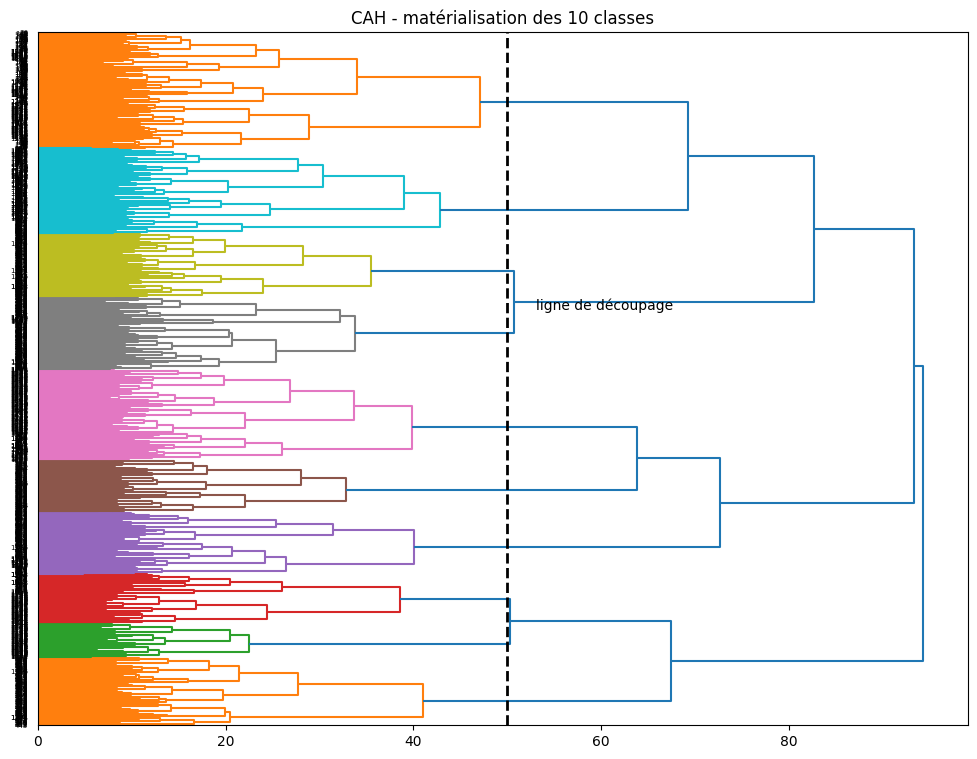

C:\Users\Nelly\AppData\Local\Temp\ipykernel_19268\3320173281.py:63: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TSS = df.shape[0]*df.var(ddof=0)


Valeur de t: t=50, découpage à cette distance on renvoie, mat_liens, eta_carre et dataframes de correspondance.




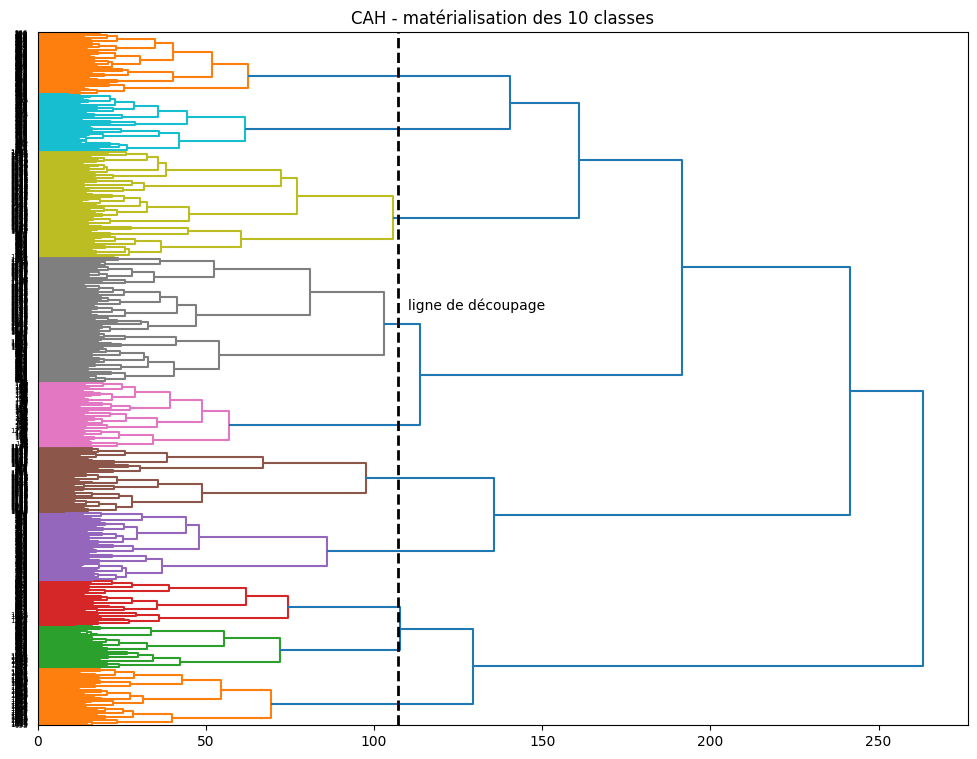

C:\Users\Nelly\AppData\Local\Temp\ipykernel_19268\3320173281.py:63: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TSS = df.shape[0]*df.var(ddof=0)


Valeur de t: t=107, découpage à cette distance on renvoie, mat_liens, eta_carre et dataframes de correspondance.




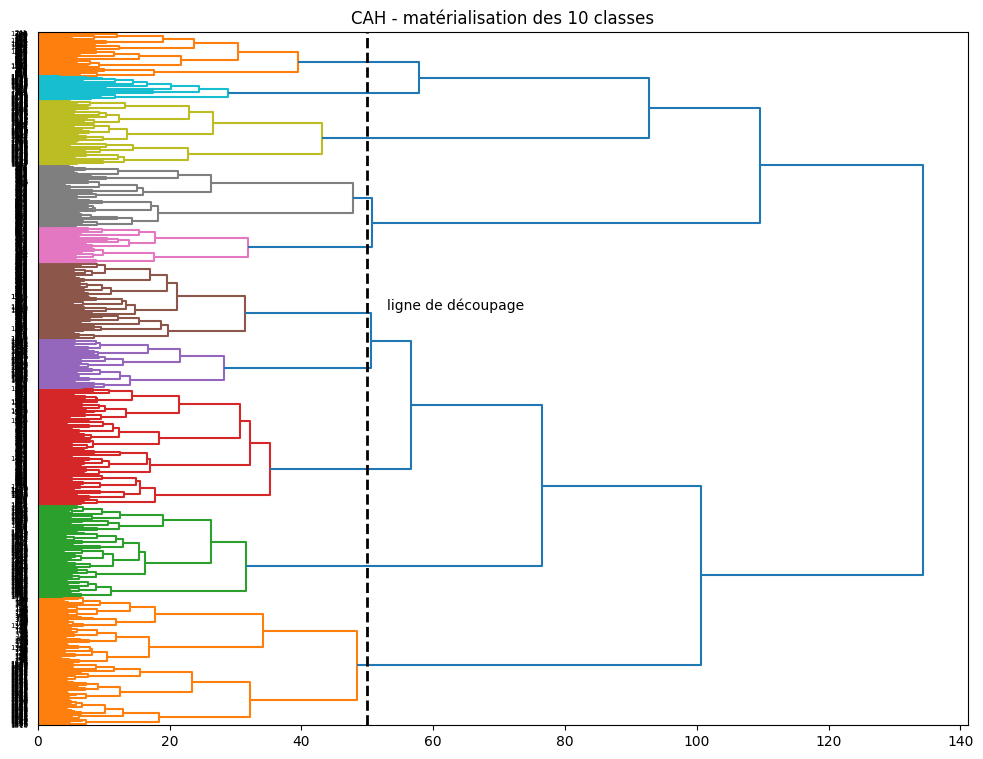

C:\Users\Nelly\AppData\Local\Temp\ipykernel_19268\3320173281.py:63: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TSS = df.shape[0]*df.var(ddof=0)


Valeur de t: t=50, découpage à cette distance on renvoie, mat_liens, eta_carre et dataframes de correspondance.




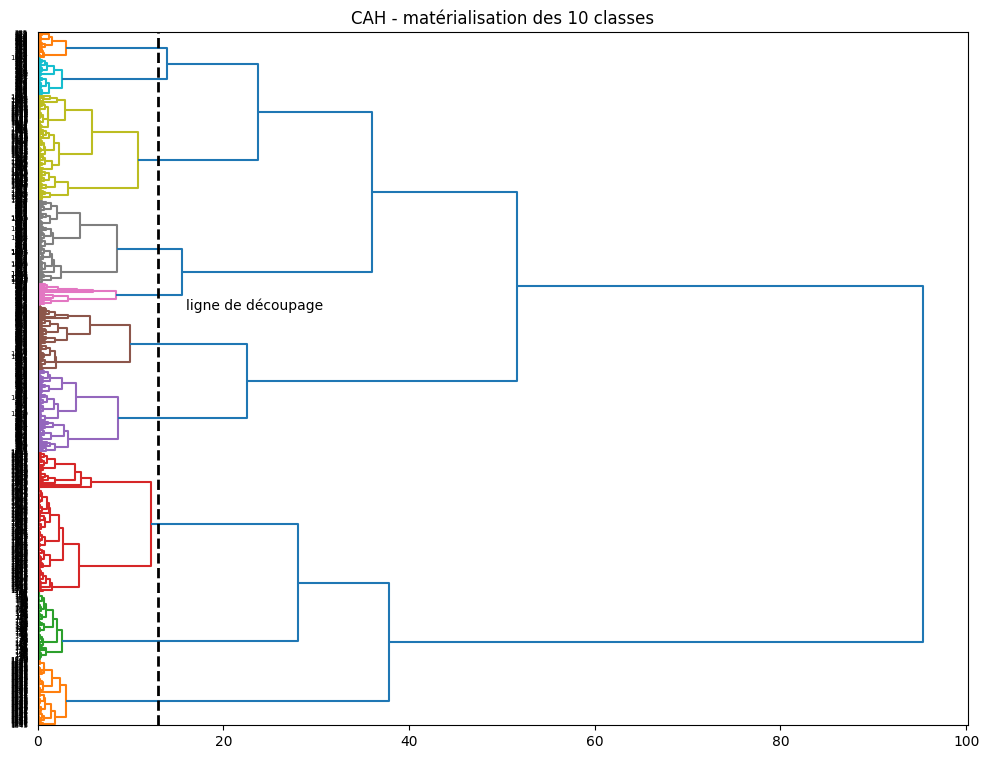

Valeur de t: t=13, découpage à cette distance on renvoie, mat_liens, eta_carre et dataframes de correspondance.




C:\Users\Nelly\AppData\Local\Temp\ipykernel_19268\3320173281.py:63: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TSS = df.shape[0]*df.var(ddof=0)


In [33]:
ls_t = (110, 49, 50, 107, 50, 13)

for i,j,k,l in zip(ls_rescah, ls_dataframes,ls_names, ls_t):
    i["mat_liens"], i["corresp_cah"], i["crosstab_cah"], i["mk_cah"], i["eta2_cah"] = clustering_cah(j, t=l)
    print("\n=========================================================================\n")

In [34]:
fac_cah["crosstab_cah"]

Cluster,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
0,0,2,0,0,0,0,147,0,1,0
1,0,19,0,0,97,16,9,0,7,2
2,1,145,0,0,0,3,0,0,0,1
3,0,16,99,5,1,27,0,0,2,0
4,0,0,0,0,0,1,1,37,31,80
5,0,3,1,98,0,43,0,0,5,0
6,0,0,1,12,0,0,5,124,3,5
7,81,53,0,0,0,16,0,0,0,0
8,0,14,0,0,0,0,131,0,5,0


In [35]:
fac_cah["eta2_cah"].sort_values(ascending=False)

fac_29    0.77570
fac_65    0.76928
fac_97    0.76738
fac_185   0.76590
fac_181   0.75392
            ...  
fac_131   0.11757
fac_179   0.10819
fac_167   0.10812
fac_35    0.10812
fac_60    0.08158
Length: 216, dtype: float64

In [36]:
four_cah["crosstab_cah"]

Cluster,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
0,0,150,0,0,0,0,0,0,0,0
1,4,0,11,66,3,0,11,53,1,1
2,0,0,4,20,122,0,3,1,0,0
3,3,0,0,15,1,0,0,59,17,55
4,2,0,2,0,2,0,18,55,23,48
5,0,0,0,0,0,0,1,45,101,3
6,0,0,0,1,0,35,38,66,3,7
7,0,0,97,3,13,0,34,3,0,0
8,146,0,0,0,0,2,0,1,1,0


In [37]:
four_cah["eta2_cah"].sort_values(ascending=False)

fou_74   0.68650
fou_73   0.63096
fou_5    0.62168
fou_7    0.61868
fou_76   0.61664
fou_69   0.58540
fou_72   0.53617
fou_2    0.52760
fou_1    0.51761
fou_71   0.51706
fou_11   0.51553
fou_3    0.50232
fou_8    0.47947
fou_6    0.44573
fou_70   0.44049
fou_14   0.42537
fou_15   0.41647
fou_18   0.38376
fou_10   0.38082
fou_67   0.36414
fou_13   0.36170
fou_65   0.34613
fou_23   0.33719
fou_61   0.32775
fou_12   0.29177
fou_63   0.27047
fou_24   0.25485
fou_75   0.25140
fou_4    0.25094
fou_57   0.24871
fou_60   0.24577
fou_17   0.24526
fou_26   0.23866
fou_53   0.23768
fou_58   0.23747
fou_16   0.23326
fou_55   0.23177
fou_9    0.23158
fou_28   0.22162
fou_21   0.20904
fou_20   0.20420
fou_66   0.20305
fou_33   0.20200
fou_68   0.19993
fou_64   0.19891
fou_36   0.18545
fou_38   0.18046
fou_49   0.17902
fou_31   0.17682
fou_39   0.17622
fou_45   0.17366
fou_54   0.17344
fou_62   0.17089
fou_51   0.17040
fou_29   0.16916
fou_30   0.16674
fou_44   0.16505
fou_59   0.16270
fou_43   0.158

In [38]:
kar_cah["crosstab_cah"]

Cluster,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
0,0,0,0,1,0,4,1,0,7,137
1,0,0,19,10,106,14,0,1,0,0
2,145,0,1,0,0,3,1,0,0,0
3,0,1,7,3,0,4,131,3,0,1
4,0,0,4,106,6,2,0,0,32,0
5,0,0,3,0,0,6,13,127,1,0
6,0,0,6,0,0,7,0,4,125,8
7,1,73,64,1,0,11,0,0,0,0
8,1,0,1,1,0,21,2,0,19,105


In [39]:
kar_cah["eta2_cah"].sort_values(ascending=False)

kar_1    0.65728
kar_3    0.58480
kar_21   0.47454
kar_11   0.46245
kar_4    0.46112
kar_28   0.43630
kar_26   0.43200
kar_6    0.43185
kar_12   0.41240
kar_5    0.40362
kar_15   0.40063
kar_9    0.39221
kar_43   0.39196
kar_2    0.36428
kar_25   0.35317
kar_10   0.33758
kar_20   0.32809
kar_7    0.31860
kar_8    0.30511
kar_34   0.30312
kar_36   0.28732
kar_44   0.28482
kar_31   0.28349
kar_19   0.28335
kar_40   0.27141
kar_14   0.26734
kar_38   0.26221
kar_39   0.26093
kar_27   0.25556
kar_37   0.25436
kar_42   0.25307
kar_56   0.24222
kar_18   0.23490
kar_45   0.23162
kar_52   0.22010
kar_16   0.21298
kar_23   0.20398
kar_13   0.19598
kar_32   0.19435
kar_48   0.19009
kar_24   0.18757
kar_50   0.18615
kar_29   0.18462
kar_47   0.18127
kar_49   0.17474
kar_51   0.17271
kar_64   0.15672
kar_53   0.15643
kar_33   0.14984
kar_62   0.12995
kar_17   0.11892
kar_30   0.11887
kar_60   0.11150
kar_57   0.09761
kar_63   0.09537
kar_58   0.09535
kar_54   0.09277
kar_46   0.09266
kar_41   0.076

In [40]:
pix_cah["crosstab_cah"]

Cluster,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
0,0,1,0,0,0,140,9,0,0,0
1,0,16,0,0,10,0,0,2,122,0
2,0,0,0,146,2,0,0,2,0,0
3,0,2,0,1,3,0,0,12,0,132
4,0,58,91,0,0,0,0,1,0,0
5,0,3,0,0,3,0,99,43,0,2
6,125,2,6,0,0,0,17,0,0,0
7,0,0,0,0,123,0,0,27,0,0
8,0,5,1,0,0,1,143,0,0,0


In [41]:
pix_cah["eta2_cah"].sort_values(ascending=False)

pix_162   0.68671
pix_177   0.67181
pix_178   0.66842
pix_163   0.64850
pix_193   0.64603
            ...  
pix_204   0.07281
pix_211   0.06983
pix_36    0.05551
pix_226   0.03928
pix_37    0.03740
Length: 240, dtype: float64

In [42]:
zer_cah["crosstab_cah"]

Cluster,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
0,141,0,5,1,0,0,0,0,0,3
1,0,0,0,0,3,47,78,0,1,21
2,0,0,132,0,8,0,0,0,0,10
3,0,1,17,2,115,0,0,3,8,4
4,0,4,0,0,7,31,55,9,2,42
5,2,22,73,20,24,0,1,0,1,7
6,1,83,8,45,2,0,0,9,2,0
7,0,0,0,0,0,0,0,113,34,3
8,134,0,9,0,3,0,0,0,0,4


In [43]:
zer_cah["eta2_cah"].sort_values(ascending=False)

zer_22   0.74397
zer_31   0.73253
zer_11   0.72654
zer_38   0.71793
zer_39   0.65915
zer_44   0.65360
zer_32   0.65299
zer_45   0.63664
zer_6    0.56977
zer_23   0.56677
zer_10   0.56566
zer_21   0.56030
zer_30   0.55511
zer_17   0.55021
zer_27   0.53947
zer_25   0.51693
zer_15   0.51227
zer_34   0.51101
zer_37   0.50394
zer_3    0.50160
zer_46   0.50090
zer_35   0.49924
zer_40   0.49845
zer_26   0.49341
zer_42   0.48380
zer_24   0.48309
zer_41   0.47341
zer_16   0.45950
zer_1    0.45445
zer_8    0.44029
zer_43   0.43215
zer_36   0.42547
zer_28   0.40951
zer_4    0.39460
zer_33   0.37314
zer_47   0.32985
zer_12   0.32729
zer_29   0.32186
zer_13   0.30434
zer_14   0.28678
zer_2    0.28552
zer_19   0.28351
zer_20   0.26336
zer_5    0.25883
zer_9    0.25252
zer_7    0.22432
zer_18   0.18332
dtype: float64

In [44]:
mor_cah["crosstab_cah"]

Cluster,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
0,0,148,0,2,0,0,0,0,0,0
1,0,0,0,0,0,2,5,13,77,53
2,0,0,1,115,6,0,6,22,0,0
3,0,0,0,6,46,28,49,21,0,0
4,0,0,0,1,0,18,92,36,1,2
5,0,0,0,51,86,0,7,6,0,0
6,0,0,149,0,0,0,0,0,1,0
7,0,0,0,0,0,0,21,129,0,0
8,143,0,7,0,0,0,0,0,0,0


In [45]:
mor_cah["eta2_cah"].sort_values(ascending=False)

mor1   1.00000
mor2   0.98868
mor3   0.98335
mor6   0.90614
mor5   0.86366
mor4   0.85059
dtype: float64

## <a id="requirements" style="color:black">REQUIREMENTS.txt</a>

<span style="color:orange">Ce notebook a été créé avec python 3.8</span>

Requirements.txt  

```
absl-py==2.1.0
anyio==4.0.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0       
arrow==1.2.3
asttokens==2.4.0
astunparse==1.6.3
async-lru==2.0.4
attrs==23.1.0
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.0.0
cachetools==4.2.4
certifi==2023.7.22
cffi==1.15.1
charset-normalizer==2.0.12
colorama==0.4.6
comm==0.1.4
cycler==0.11.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.1.3
executing==1.2.0
fastjsonschema==2.18.0
fonttools==4.42.1
fqdn==1.5.1
gast==0.3.3
google-auth==1.35.0
google-auth-oauthlib==0.4.6        
google-pasta==0.2.0
grpcio==1.66.2
h5py==2.10.0
htmlmin==0.1.12
idna==3.4
ImageHash==4.3.1
importlib-metadata==8.5.0
importlib-resources==6.4.5
ipykernel==6.25.2
ipython==8.12.0
ipython-genutils==0.2.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.0
Jinja2==3.1.2
joblib==1.1.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.19.0
jsonschema-specifications==2023.7.1
jupyter==1.0.0
jupyter-client==8.3.1
jupyter-console==6.6.3
jupyter-core==5.3.1
jupyter-events==0.7.0
jupyter-lsp==2.2.0
jupyter-server==2.7.3
jupyter-server-terminals==0.4.4
jupyterlab==4.0.6
jupyterlab-pygments==0.2.2
jupyterlab-server==2.25.0
jupyterlab-widgets==3.0.9
Keras==2.4.3
Keras-Preprocessing==1.1.2
kiwisolver==1.4.5
Markdown==3.7
MarkupSafe==2.1.3
matplotlib==3.5.3
matplotlib-inline==0.1.6
missingno==0.5.2
mistune==3.0.1
multimethod==1.8
nbclient==0.8.0
nbconvert==7.8.0
nbformat==5.9.2
nest-asyncio==1.5.8
networkx==3.1
notebook==7.0.3
notebook-shim==0.2.3
numpy==1.22.0
oauthlib==3.2.2
opt-einsum==3.4.0
overrides==7.4.0
packaging==23.1
pandas==1.4.0
pandas-profiling==3.3.0
pandocfilters==1.5.0
parso==0.8.3
patsy==0.5.3
pexpect==4.8.0
phik==0.12.3
pickleshare==0.7.5
Pillow==10.0.1
pkgutil-resolve-name==1.3.10
platformdirs==3.10.0
prometheus-client==0.17.1
prompt-toolkit==3.0.39
protobuf==3.20.3
psutil==5.9.5
ptyprocess==0.7.0
pure-eval==0.2.2
pyasn1==0.6.1
pyasn1-modules==0.4.1
pycparser==2.21
pydantic==1.9.2
Pygments==2.16.1
pyparsing==3.1.1
python-dateutil==2.8.2
python-json-logger==2.0.7
pytz==2023.3.post1
PyWavelets==1.4.1
pywin32==306
pywinpty==2.0.13
PyYAML==6.0.1
pyzmq==25.1.1
qtconsole==5.4.4
QtPy==2.4.0
referencing==0.30.2
requests==2.28.0
requests-oauthlib==2.0.0
rfc3339-validator==0.1.4
rfc3986-validator==0.1.1
rpds-py==0.10.3
rsa==4.9
scikit-learn==0.23.2
scipy==1.4.1
seaborn==0.11.2
Send2Trash==1.8.2
six==1.16.0
sniffio==1.3.0
soupsieve==2.5
stack-data==0.6.2
statsmodels==0.13.5
tangled-up-in-unicode==0.2.0
tensorboard==2.2.2
tensorboard-plugin-wit==1.8.1
tensorflow==2.2.0
tensorflow-estimator==2.2.0
termcolor==2.4.0
terminado==0.17.1
threadpoolctl==3.5.0
tinycss2==1.2.1
tomli==2.0.1
tornado==6.3.3
tqdm==4.64.1
traitlets==5.10.0
typing-extensions==4.7.1
uri-template==1.3.0
urllib3==1.26.16
visions==0.7.5
wcwidth==0.2.6
webcolors==1.13
webencodings==0.5.1
websocket-client==1.6.3
werkzeug==3.0.4
widgetsnbextension==4.0.9
wrapt==1.16.0
xlrd==2.0.1
zipp==3.20.2
```